# Brazillian E-commerce Dataset Olist




**This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.**

**This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.**




In [1]:
#libraries for preparation and visualization
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
import os
path = "./dados_olist"
dir_list = os.listdir(path)

df = {}
for arq in dir_list:
    df[arq.strip('.csv').replace('olist_','')] = pd.read_csv(os.path.join(path, arq))

In [3]:
#veryfying the names of the datasets
for arq in dir_list:
    print(arq.strip('.csv').replace('olist_',''))

customers_dataset
geolocation_dataset
orders_dataset
order_items_dataset
order_payments_dataset
order_reviews_dataset
products_dataset
sellers_dataset
product_category_name_translation


In [4]:
geolocation_dataset = df['geolocation_dataset']
customers_dataset = df['customers_dataset']
products_dataset = df['products_dataset']
order_reviews_dataset = df['order_reviews_dataset']
orders_dataset = df['orders_dataset']
sellers_dataset = df['sellers_dataset']
order_items_dataset = df['order_items_dataset']
product_category_name_translation = df['product_category_name_translation']
order_payments_dataset = df['order_payments_dataset']

In [5]:
# prices = order_items_dataset[['price','freight_value',]]
# order_payments.loc[:,'payment_value'] = prices['payment_value']
# prices

### Geolocation dataset:
<li>Indicating the zip code, latitude, longitude, city and state

In [6]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [48]:
# # Plot the graphs from geopandas library using latitude and longitude
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# geometry = [Point(xy) for xy in zip(geolocation['geolocation_lng'], geolocation['geolocation_lat'])]
# gdf = GeoDataFrame(geolocation, geometry=geometry)   

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Notice that the majority os the customers are from Brazil, however there are customers outside ordering from Brazil.

### Customer dataset:

In [8]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customers_dataset['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

##### The following data shows how many orders were placed by state based on the customer dataset

In [10]:
customers_by_state = customers_dataset.groupby(by='customer_state', as_index=False).agg({'customer_city': pd.Series.nunique})
customers_by_state.rename(columns={'customer_city':'number of orders'}, inplace=True)
customers_by_state = customers_by_state.sort_values(by='number of orders', ascending=False)
customers_by_state

,customer_state,number of orders
10,MG,745
25,SP,629
22,RS,379
17,PR,364
4,BA,353
23,SC,240
8,GO,178
5,CE,161
15,PE,152
18,RJ,149


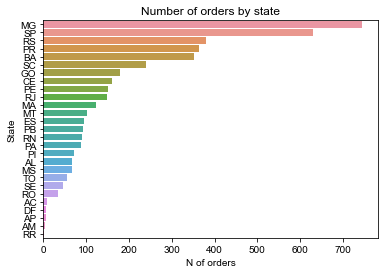

In [11]:
sns.barplot(x = 'number of orders', y = 'customer_state', data = customers_by_state)
plt.title('Number of orders by state')
plt.ylabel('State')
plt.xlabel('N of orders')
sns.set(rc={'figure.figsize':(15,8.27)})

Text(0, 0.5, 'No of customers')

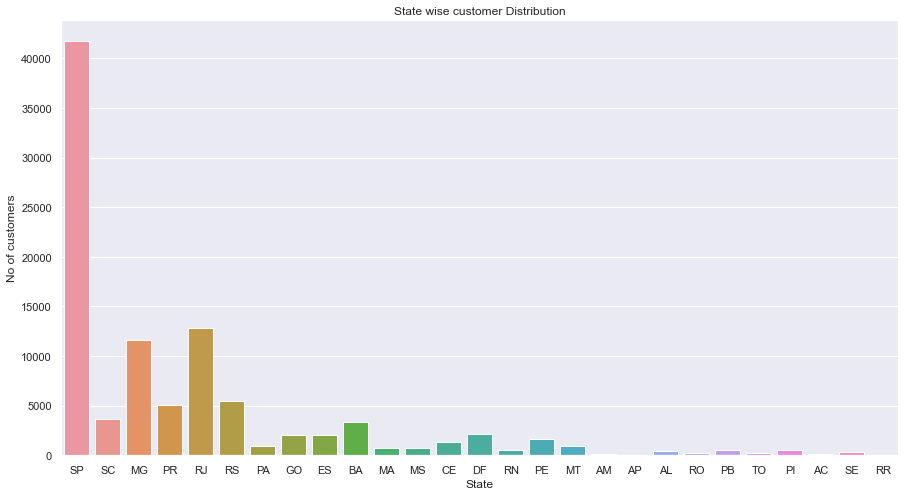

In [12]:
#Number of customers by state
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=customers_dataset)
plt.title('State wise customer Distribution')
plt.xlabel('State')
plt.ylabel('No of customers')

As we can see
<li> the most hot state to the E-commerce is São Paulo</li>

In [13]:
customers_SP = customers_dataset[customers_dataset['customer_state'] == 'SP']
customers_SP[customers_SP['customer_city'] == 'franca']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
241,b9885472fa562ddc1cb5333a42b654fc,2767ebe1fedf70562aa588a37a23080a,14401,franca,SP
650,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP
700,de3fa59dd658cd8b47a1634125047c01,fa87e5558d2010f19641ca49363d5a1a,14405,franca,SP
1894,0489975a325480c9e385e9f135bb13c3,b577af9a54b023b4bcc51f69bb937f1c,14406,franca,SP
...,...,...,...,...,...
97420,e362750942a269ffb3be2aa866d81344,d47a6832268d7fb2d351d1dfc7f6efa2,14403,franca,SP
98129,01edba0c1380aa0c91437bee4b7193a5,321606e7fd388f26b3a6ab005fa494f8,14403,franca,SP
98847,250140565b02546b115981ac3442ed86,549038e2c41350e6ac5a9d601a93ceed,14406,franca,SP
98852,a26d969df103529ca7d2dc3b8f8a1e5a,c1d17de7f48b64a544769023500456f0,14403,franca,SP


<div>
    </div>

### Products dataset:

There are two datasets holding info from products:

In [14]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [16]:
products_dataset = products_dataset.merge(product_category_name_translation, left_on='product_category_name', right_on='product_category_name_english')
products_dataset.head()

,product_id,product_category_name_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_y,product_category_name_english
0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff,cool_stuff
1,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,cool_stuff,cool_stuff
2,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,cool_stuff,cool_stuff
3,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0,cool_stuff,cool_stuff
4,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0,cool_stuff,cool_stuff


In [17]:
products_dataset = products_dataset.drop(columns=['product_category_name_x'])

In [18]:
products_dataset['product_category_name_y'].unique()

array(['cool_stuff', 'pet_shop', 'consoles_games', 'market_place',
       'la_cuisine', 'audio', 'dvds_blu_ray'], dtype=object)

<div>
</div>

<div>
    </div>

### Orders reviews dataset:

In [19]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
order_reviews_dataset = order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

Text(0, 0.5, 'No. of Reviews')

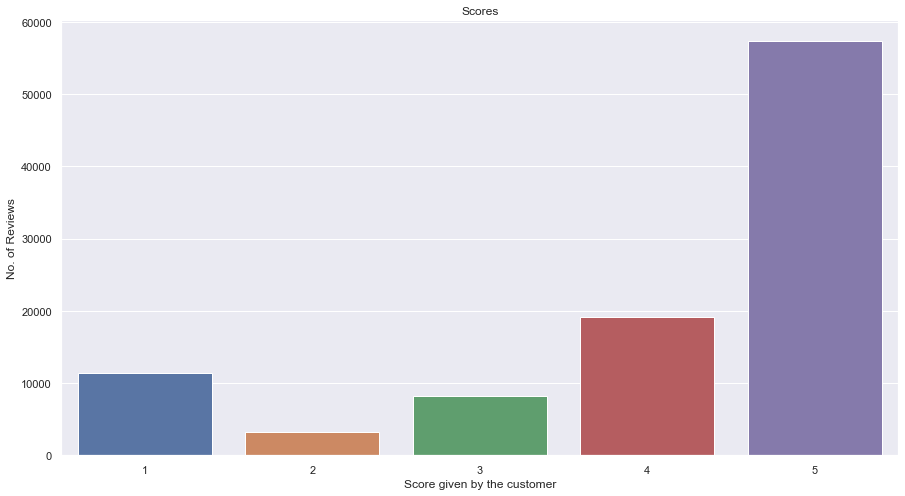

In [22]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=order_reviews_dataset)
plt.title('Scores')
plt.xlabel('Score given by the customer')
plt.ylabel('No. of Reviews')

### Orders dataset:

In [23]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

In [25]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [26]:
(orders_dataset['order_delivered_customer_date'] - orders_dataset['order_approved_at']).mean()

Timedelta('12 days 03:07:42.855694470')

<li>That indicates the average time for deliveries is about 12 days</li>

In [27]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
orders_dataset.shape

(99441, 8)

In [29]:
orders_dataset = orders_dataset.dropna()

In [30]:
orders_dataset.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

### Sellers dataset:

In [31]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Text(0, 0.5, 'No. of orders')

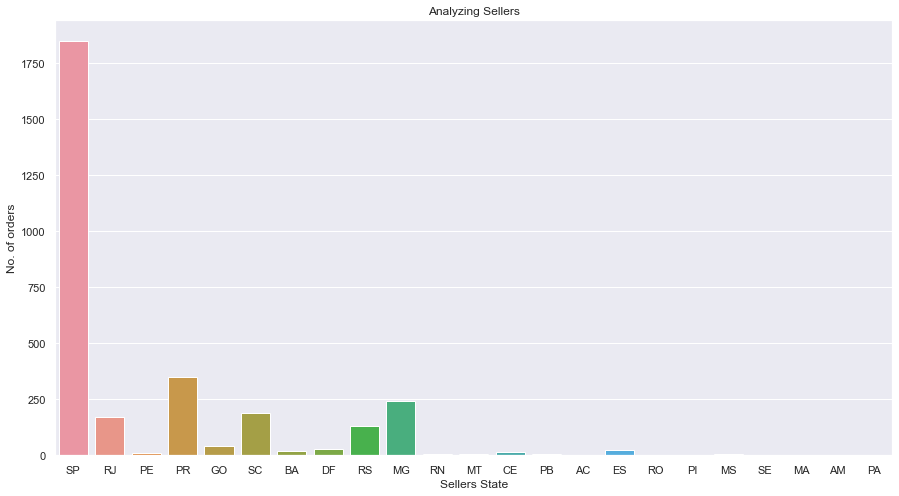

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=sellers_dataset)
plt.title('Analyzing Sellers')
plt.xlabel('Sellers State')
plt.ylabel('No. of orders')

In [33]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Payments dataset:

In [34]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Text(0, 0.5, 'No of customers')

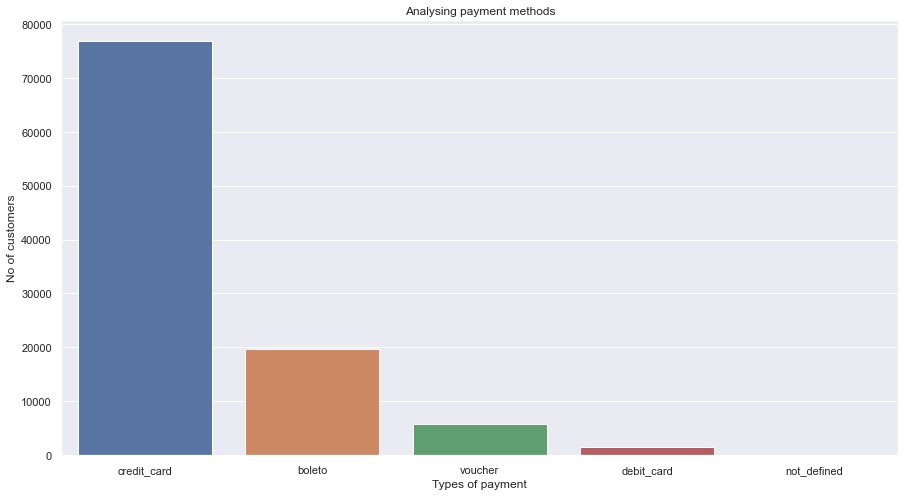

In [35]:
#Analyze payments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=order_payments_dataset)
plt.title('Analysing payment methods')
plt.xlabel('Types of payment')
plt.ylabel('No of customers')

In [36]:
order_payments_dataset.isnull().sum()
# no missing data, alhough, we can see some types of payment which are not defined

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
order_payments = order_payments_dataset.loc[order_payments_dataset['payment_type'] != 'not_defined']
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

Text(0, 0.5, 'No of customers')

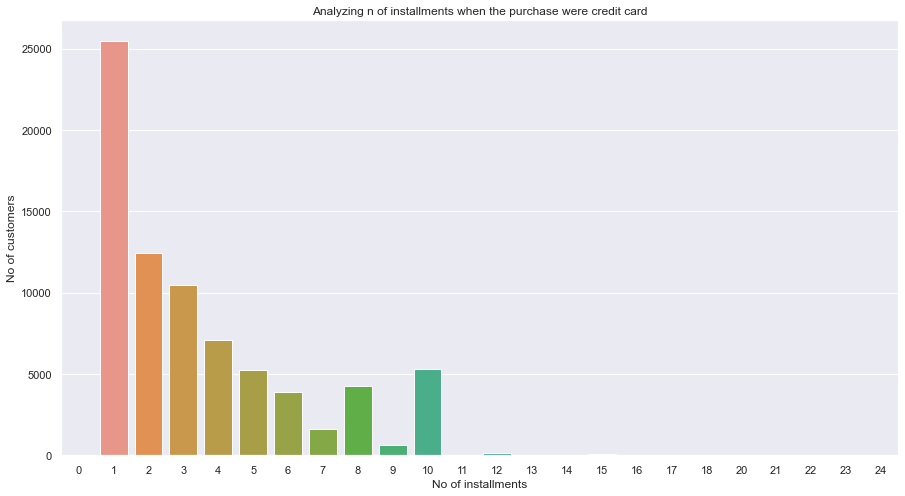

In [38]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=order_payments_dataset[order_payments_dataset['payment_type'] == 'credit_card'])
plt.title('Analyzing n of installments when the purchase were credit card')
plt.xlabel('No of installments')
plt.ylabel('No of customers')

Even using credit card most people tend to pay all in once

Text(0, 0.5, 'No. of Orders')

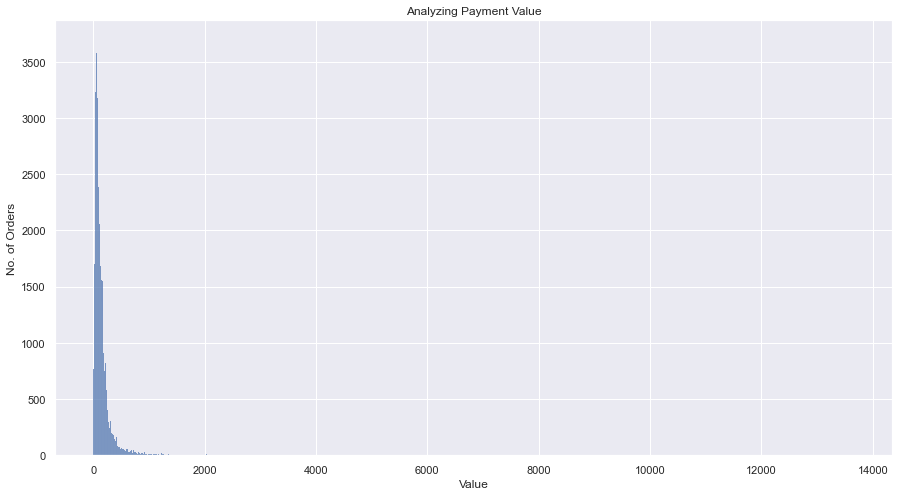

In [39]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=order_payments_dataset)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

Text(0, 0.5, 'Payment value')

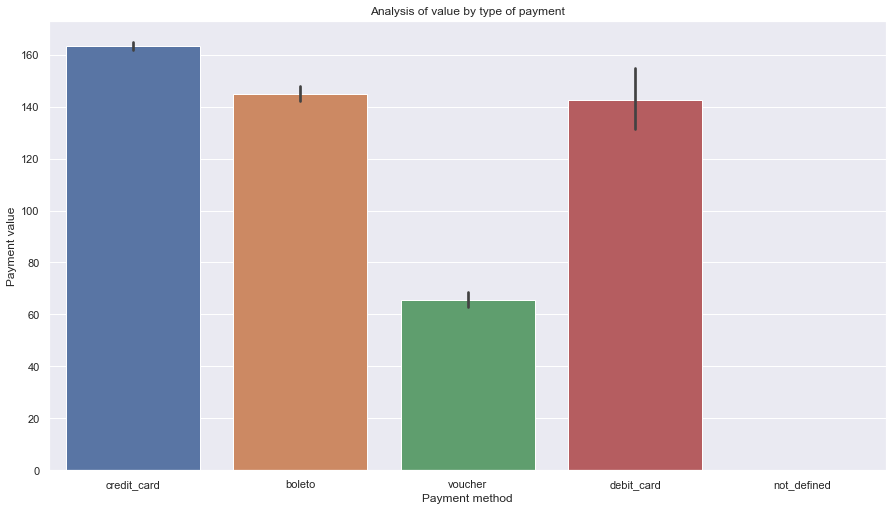

In [40]:
# analyzing amount paid by each payment method
sns.barplot(x='payment_type', y='payment_value', data=order_payments_dataset)
plt.title('Analysis of value by type of payment')
plt.xlabel('Payment method')
plt.ylabel('Payment value')

Most most amount is paid by credit card, followed by boleto and debit card